In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option("display.max_columns",500)

In [141]:
ft=pd.read_csv("Marketing-Customer-Value-Analysis.csv")

In [142]:
ft.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [143]:
ft.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [144]:
ft.shape

(9134, 24)

In [145]:
ft["Income"].unique()

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

In [146]:
ft.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [147]:
ft.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [148]:
ft.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [149]:
ft.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [150]:
train,test=train_test_split(ft,test_size=0.3, random_state=123)

In [151]:
train.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2284,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,1/27/11,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large
7759,GX38439,California,4470.181084,No,Extended,College,1/23/11,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize
4285,TE31876,California,11814.532410,No,Basic,High School or Below,2/21/11,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large
2148,IL42365,Arizona,4804.358510,No,Extended,High School or Below,1/29/11,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize
7942,ZI63885,Washington,14713.523290,No,Extended,High School or Below,1/7/11,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize
4212,WX92363,Washington,4250.775183,No,Basic,Bachelor,2/23/11,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize
4439,GT18023,California,11281.524510,No,Extended,High School or Below,2/15/11,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize
8945,UE75424,California,10732.507470,No,Extended,Doctor,2/22/11,Employed,M,75728,Rural,Married,133,24,68,0,4,Corporate Auto,Corporate L3,Offer1,Call Center,44.159065,SUV,Medsize
4687,OH76118,Washington,2767.499996,No,Basic,High School or Below,1/27/11,Unemployed,F,0,Rural,Married,72,27,60,0,1,Personal Auto,Personal L2,Offer1,Web,22.326388,Four-Door Car,Medsize
6824,XB61209,Arizona,3508.925370,No,Extended,College,1/6/11,Unemployed,F,0,Suburban,Single,97,19,18,0,1,Personal Auto,Personal L3,Offer1,Agent,698.400000,Four-Door Car,Small


In [152]:
## A1
train.reset_index(drop=True, inplace=True)

In [153]:
train.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [154]:
train.duplicated().sum()

0

In [155]:
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)
train.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,1/27/11,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large
1,GX38439,California,4470.181084,No,Extended,College,1/23/11,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize
2,TE31876,California,11814.532410,No,Basic,High School or Below,2/21/11,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,1/29/11,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,1/7/11,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize


In [156]:
train.head(8)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,1/27/11,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large
1,GX38439,California,4470.181084,No,Extended,College,1/23/11,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize
2,TE31876,California,11814.532410,No,Basic,High School or Below,2/21/11,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,1/29/11,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,1/7/11,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize
5,WX92363,Washington,4250.775183,No,Basic,Bachelor,2/23/11,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize
6,GT18023,California,11281.524510,No,Extended,High School or Below,2/15/11,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize
7,UE75424,California,10732.507470,No,Extended,Doctor,2/22/11,Employed,M,75728,Rural,Married,133,24,68,0,4,Corporate Auto,Corporate L3,Offer1,Call Center,44.159065,SUV,Medsize


In [157]:
## ACtion 2
train["Effective To Date"]=pd.to_datetime(train["Effective To Date"])

In [158]:
train.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [159]:
for i in ft.columns:
    if ft[i].dtypes=="O":
        print(f"{i} has {ft[i].nunique()} Categories\n and they are\n{ft[i].unique()}\n")
        

Customer has 9134 Categories
 and they are
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

State has 5 Categories
 and they are
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Response has 2 Categories
 and they are
['No' 'Yes']

Coverage has 3 Categories
 and they are
['Basic' 'Extended' 'Premium']

Education has 5 Categories
 and they are
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Effective To Date has 59 Categories
 and they are
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2

In [160]:
for i in ft.columns:
    if ft[i].dtypes=="int64":
        print(f"{i} has {ft[i].nunique()} Categories\n and they are\n{ft[i].unique()}\n")
        

Income has 5694 Categories
 and they are
[56274     0 48767 ... 66367 71941 21941]

Monthly Premium Auto has 202 Categories
 and they are
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286]

Months Since Last Claim has 36 Categorie

In [161]:
# A3
train["Month"]=train["Effective To Date"].dt.month
train["days"]=train["Effective To Date"].dt.day
train["Year"]=train["Effective To Date"].dt.year
train.head(8)
train.tail(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year
6383,PC12390,Nevada,5507.155471,No,Basic,Master,2011-02-07,Employed,M,74960,Rural,Single,69,11,44,1,3,Corporate Auto,Corporate L1,Offer1,Call Center,107.985836,Four-Door Car,Medsize,2,7,2011
6384,VG43444,Oregon,3837.492458,No,Extended,Bachelor,2011-02-01,Employed,M,36794,Suburban,Single,99,0,75,0,1,Personal Auto,Personal L3,Offer1,Agent,712.800000,Four-Door Car,Large,2,1,2011
6385,LI13735,Oregon,3113.338974,No,Extended,Bachelor,2011-02-03,Employed,F,85586,Rural,Married,77,11,55,0,1,Personal Auto,Personal L3,Offer4,Call Center,13.444132,Two-Door Car,Medsize,2,3,2011
6386,KH48895,Arizona,8375.353929,No,Basic,Master,2011-02-15,Medical Leave,F,17780,Rural,Married,109,12,18,0,9,Personal Auto,Personal L3,Offer1,Branch,132.588288,SUV,Medsize,2,15,2011
6387,NE16405,California,2582.408525,Yes,Basic,Bachelor,2011-02-14,Employed,F,76731,Urban,Married,64,2,68,0,1,Personal Auto,Personal L2,Offer2,Agent,201.455005,Four-Door Car,Medsize,2,14,2011
6388,GQ26671,California,2241.108638,No,Basic,High School or Below,2011-02-06,Unemployed,F,0,Suburban,Single,63,5,7,0,1,Personal Auto,Personal L2,Offer2,Call Center,453.600000,Two-Door Car,Medsize,2,6,2011
6389,DE23903,Oregon,5905.971667,No,Basic,Bachelor,2011-02-22,Employed,F,59848,Rural,Married,73,5,98,1,3,Personal Auto,Personal L3,Offer1,Call Center,131.614733,Two-Door Car,Medsize,2,22,2011
6390,LJ35581,Washington,10025.918270,No,Premium,Bachelor,2011-02-28,Unemployed,F,0,Suburban,Single,141,25,27,0,3,Personal Auto,Personal L3,Offer2,Agent,1015.200000,SUV,Medsize,2,28,2011
6391,NM42917,Arizona,9927.877699,No,Extended,College,2011-01-12,Employed,F,58703,Rural,Married,127,32,26,2,6,Personal Auto,Personal L3,Offer3,Agent,227.916076,SUV,Small,1,12,2011
6392,FQ51281,Oregon,8170.621997,No,Basic,Bachelor,2011-01-27,Employed,F,95241,Rural,Married,68,3,12,1,2,Personal Auto,Personal L3,Offer2,Branch,87.803087,Four-Door Car,Large,1,27,2011


In [162]:
###funn= ft.groupby('Customer Lifetime Value').agg({'Number of Policies':'count','Customer Lifetime Value':'sum'})
###funn

In [163]:
train["income_to_premium_ratio"]=train["Income"]/train["Monthly Premium Auto"]
print(train["income_to_premium_ratio"].mean())
train

444.80630381783607


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,2011-01-27,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000000
1,GX38439,California,4470.181084,No,Extended,College,2011-01-23,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000000
2,TE31876,California,11814.532410,No,Basic,High School or Below,2011-02-21,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000000
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,2011-01-29,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696000
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,2011-01-07,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,GQ26671,California,2241.108638,No,Basic,High School or Below,2011-02-06,Unemployed,F,0,Suburban,Single,63,5,7,0,1,Personal Auto,Personal L2,Offer2,Call Center,453.600000,Two-Door Car,Medsize,2,6,2011,0.000000
6389,DE23903,Oregon,5905.971667,No,Basic,Bachelor,2011-02-22,Employed,F,59848,Rural,Married,73,5,98,1,3,Personal Auto,Personal L3,Offer1,Call Center,131.614733,Two-Door Car,Medsize,2,22,2011,819.835616
6390,LJ35581,Washington,10025.918270,No,Premium,Bachelor,2011-02-28,Unemployed,F,0,Suburban,Single,141,25,27,0,3,Personal Auto,Personal L3,Offer2,Agent,1015.200000,SUV,Medsize,2,28,2011,0.000000
6391,NM42917,Arizona,9927.877699,No,Extended,College,2011-01-12,Employed,F,58703,Rural,Married,127,32,26,2,6,Personal Auto,Personal L3,Offer3,Agent,227.916076,SUV,Small,1,12,2011,462.228346


In [164]:
train["open complaints"]= train["Number of Open Complaints"].apply (lambda x:"Yes" if x > 0 else "No")
train.head(20)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio,open complaints
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,2011-01-27,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000000,No
1,GX38439,California,4470.181084,No,Extended,College,2011-01-23,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000000,No
2,TE31876,California,11814.532410,No,Basic,High School or Below,2011-02-21,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000000,Yes
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,2011-01-29,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696000,Yes
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,2011-01-07,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000000,No
5,WX92363,Washington,4250.775183,No,Basic,Bachelor,2011-02-23,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize,2,23,2011,255.629630,No
6,GT18023,California,11281.524510,No,Extended,High School or Below,2011-02-15,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize,2,15,2011,620.107914,No
7,UE75424,California,10732.507470,No,Extended,Doctor,2011-02-22,Employed,M,75728,Rural,Married,133,24,68,0,4,Corporate Auto,Corporate L3,Offer1,Call Center,44.159065,SUV,Medsize,2,22,2011,569.383459,No
8,OH76118,Washington,2767.499996,No,Basic,High School or Below,2011-01-27,Unemployed,F,0,Rural,Married,72,27,60,0,1,Personal Auto,Personal L2,Offer1,Web,22.326388,Four-Door Car,Medsize,1,27,2011,0.000000,No
9,XB61209,Arizona,3508.925370,No,Extended,College,2011-01-06,Unemployed,F,0,Suburban,Single,97,19,18,0,1,Personal Auto,Personal L3,Offer1,Agent,698.400000,Four-Door Car,Small,1,6,2011,0.000000,No


In [165]:
train['Premium to LTV_ratio']= train["Monthly Premium Auto"]/train['Customer Lifetime Value']
train.head(7)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio,open complaints,Premium to LTV_ratio
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,2011-01-27,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000000,No,0.013876
1,GX38439,California,4470.181084,No,Extended,College,2011-01-23,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000000,No,0.028858
2,TE31876,California,11814.532410,No,Basic,High School or Below,2011-02-21,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000000,Yes,0.008633
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,2011-01-29,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696000,Yes,0.026018
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,2011-01-07,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000000,No,0.005777
5,WX92363,Washington,4250.775183,No,Basic,Bachelor,2011-02-23,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize,2,23,2011,255.629630,No,0.025407
6,GT18023,California,11281.524510,No,Extended,High School or Below,2011-02-15,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize,2,15,2011,620.107914,No,0.012321


In [166]:
train["total amount claimed_ratio"]=train["Total Claim Amount"]/train["Monthly Premium Auto"]
train.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio,open complaints,Premium to LTV_ratio,total amount claimed_ratio
0,OQ82364,Nevada,6846.150323,Yes,Extended,Bachelor,2011-01-27,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000000,No,0.013876,4.800000
1,GX38439,California,4470.181084,No,Extended,College,2011-01-23,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000000,No,0.028858,7.200000
2,TE31876,California,11814.532410,No,Basic,High School or Below,2011-02-21,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000000,Yes,0.008633,4.800000
3,IL42365,Arizona,4804.358510,No,Extended,High School or Below,2011-01-29,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696000,Yes,0.026018,6.305655
4,ZI63885,Washington,14713.523290,No,Extended,High School or Below,2011-01-07,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000000,No,0.005777,10.318054
5,WX92363,Washington,4250.775183,No,Basic,Bachelor,2011-02-23,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize,2,23,2011,255.629630,No,0.025407,2.860682
6,GT18023,California,11281.524510,No,Extended,High School or Below,2011-02-15,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize,2,15,2011,620.107914,No,0.012321,4.328546
7,UE75424,California,10732.507470,No,Extended,Doctor,2011-02-22,Employed,M,75728,Rural,Married,133,24,68,0,4,Corporate Auto,Corporate L3,Offer1,Call Center,44.159065,SUV,Medsize,2,22,2011,569.383459,No,0.012392,0.332023
8,OH76118,Washington,2767.499996,No,Basic,High School or Below,2011-01-27,Unemployed,F,0,Rural,Married,72,27,60,0,1,Personal Auto,Personal L2,Offer1,Web,22.326388,Four-Door Car,Medsize,1,27,2011,0.000000,No,0.026016,0.310089
9,XB61209,Arizona,3508.925370,No,Extended,College,2011-01-06,Unemployed,F,0,Suburban,Single,97,19,18,0,1,Personal Auto,Personal L3,Offer1,Agent,698.400000,Four-Door Car,Small,1,6,2011,0.000000,No,0.027644,7.200000


In [167]:
## Capping in Outliers cause i do not have a big dataset

def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    return data

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

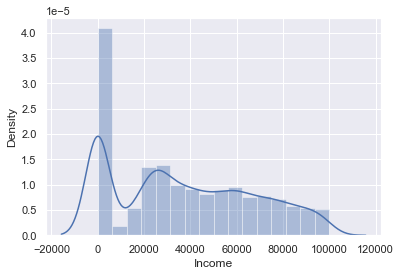

In [168]:
sns.distplot(train["Income"])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

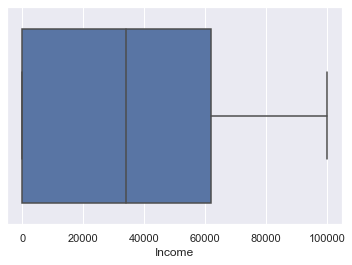

In [169]:
sns.boxplot(train["Income"])

In [170]:
train.duplicated().sum()

0

In [171]:
#A4
train=cap_outlier(train,"Income")

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

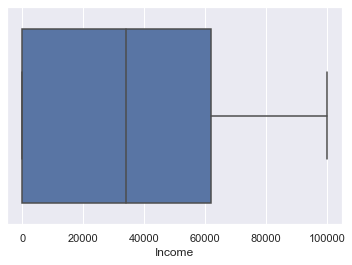

In [172]:
sns.boxplot(train["Income"])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

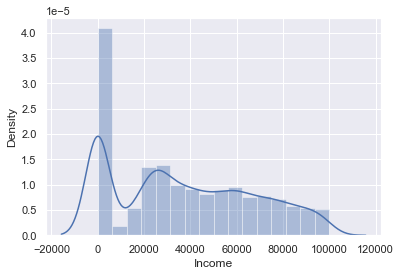

In [173]:
sns.distplot(train["Income"])

In [174]:
train.shape

(6393, 31)

In [175]:
cat1=[]
for i in train.columns:
    if train[i].dtype=="O":
        cat1.append(i)
cat1

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'open complaints']

In [176]:
train.duplicated().sum()

0

In [177]:
for i in cat1:
    print(f"{i} has {train[i].nunique()} categories\nThey are:\n{train[i].unique()} \n")
    

Customer has 6393 categories
They are:
['OQ82364' 'GX38439' 'TE31876' ... 'LJ35581' 'NM42917' 'FQ51281'] 

State has 5 categories
They are:
['Nevada' 'California' 'Arizona' 'Washington' 'Oregon'] 

Response has 2 categories
They are:
['Yes' 'No'] 

Coverage has 3 categories
They are:
['Extended' 'Basic' 'Premium'] 

Education has 5 categories
They are:
['Bachelor' 'College' 'High School or Below' 'Doctor' 'Master'] 

EmploymentStatus has 5 categories
They are:
['Unemployed' 'Employed' 'Retired' 'Disabled' 'Medical Leave'] 

Gender has 2 categories
They are:
['F' 'M'] 

Location Code has 3 categories
They are:
['Suburban' 'Urban' 'Rural'] 

Marital Status has 3 categories
They are:
['Divorced' 'Single' 'Married'] 

Policy Type has 3 categories
They are:
['Corporate Auto' 'Personal Auto' 'Special Auto'] 

Policy has 9 categories
They are:
['Corporate L3' 'Personal L2' 'Personal L3' 'Special L2' 'Personal L1'
 'Corporate L2' 'Corporate L1' 'Special L3' 'Special L1'] 

Renew Offer Type has

In [178]:
col=train.columns

In [179]:
col

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Month', 'days', 'Year',
       'income_to_premium_ratio', 'open complaints', 'Premium to LTV_ratio',
       'total amount claimed_ratio'],
      dtype='object')

In [180]:
## A 5
train=train.drop(['Customer','Effective To Date'],axis=1)
train.head(10)



,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio,open complaints,Premium to LTV_ratio,total amount claimed_ratio
0,Nevada,6846.150323,Yes,Extended,Bachelor,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000000,No,0.013876,4.800000
1,California,4470.181084,No,Extended,College,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000000,No,0.028858,7.200000
2,California,11814.532410,No,Basic,High School or Below,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000000,Yes,0.008633,4.800000
3,Arizona,4804.358510,No,Extended,High School or Below,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696000,Yes,0.026018,6.305655
4,Washington,14713.523290,No,Extended,High School or Below,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000000,No,0.005777,10.318054
5,Washington,4250.775183,No,Basic,Bachelor,Employed,F,27608,Urban,Divorced,108,30,89,0,1,Personal Auto,Personal L3,Offer1,Branch,308.953614,SUV,Medsize,2,23,2011,255.629630,No,0.025407,2.860682
6,California,11281.524510,No,Extended,High School or Below,Employed,F,86195,Urban,Married,139,12,10,0,3,Special Auto,Special L2,Offer1,Agent,601.667902,SUV,Medsize,2,15,2011,620.107914,No,0.012321,4.328546
7,California,10732.507470,No,Extended,Doctor,Employed,M,75728,Rural,Married,133,24,68,0,4,Corporate Auto,Corporate L3,Offer1,Call Center,44.159065,SUV,Medsize,2,22,2011,569.383459,No,0.012392,0.332023
8,Washington,2767.499996,No,Basic,High School or Below,Unemployed,F,0,Rural,Married,72,27,60,0,1,Personal Auto,Personal L2,Offer1,Web,22.326388,Four-Door Car,Medsize,1,27,2011,0.000000,No,0.026016,0.310089
9,Arizona,3508.925370,No,Extended,College,Unemployed,F,0,Suburban,Single,97,19,18,0,1,Personal Auto,Personal L3,Offer1,Agent,698.400000,Four-Door Car,Small,1,6,2011,0.000000,No,0.027644,7.200000


In [181]:
train.duplicated().sum()

94

In [182]:
train.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Month                            0
days                             0
Year                             0
income_to_premium_ratio          0
open complaints                  0
Premium to LTV_ratio             0
total amount claimed

In [183]:
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)
train.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,days,Year,income_to_premium_ratio,open complaints,Premium to LTV_ratio,total amount claimed_ratio
0,Nevada,6846.150323,Yes,Extended,Bachelor,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Corporate Auto,Corporate L3,Offer1,Call Center,456.000000,Two-Door Car,Large,1,27,2011,0.000,No,0.013876,4.800000
1,California,4470.181084,No,Extended,College,Unemployed,F,0,Suburban,Single,129,2,72,0,1,Personal Auto,Personal L2,Offer4,Web,928.800000,SUV,Medsize,1,23,2011,0.000,No,0.028858,7.200000
2,California,11814.532410,No,Basic,High School or Below,Employed,F,41004,Suburban,Married,102,15,26,3,2,Personal Auto,Personal L3,Offer1,Call Center,489.600000,Sports Car,Large,2,21,2011,402.000,Yes,0.008633,4.800000
3,Arizona,4804.358510,No,Extended,High School or Below,Employed,F,51962,Suburban,Married,125,8,2,4,1,Personal Auto,Personal L2,Offer1,Branch,788.206874,Sports Car,Medsize,1,29,2011,415.696,Yes,0.026018,6.305655
4,Washington,14713.523290,No,Extended,High School or Below,Unemployed,M,0,Suburban,Single,85,4,18,0,2,Personal Auto,Personal L2,Offer1,Branch,877.034575,Four-Door Car,Medsize,1,7,2011,0.000,No,0.005777,10.318054


In [184]:
X_train=train.drop(["Customer Lifetime Value"],axis=1)
y_train=train["Customer Lifetime Value"]

In [185]:
cat1=[]
for i in X_train.columns:
    if X_train[i].dtype=="O":
        cat1.append(i)
cat1

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'open complaints']

In [186]:
train.shape

(6299, 29)

In [187]:
train.duplicated().sum()

0

In [188]:
encoder= OneHotEncoder(drop="first",dtype=int)
enc_data=pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
enc_data.columns=encoder.get_feature_names_out()
X_train=X_train.join(enc_data)

X_train.drop(cat1,axis=1,inplace=True)



In [189]:
X_train

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,days,Year,income_to_premium_ratio,Premium to LTV_ratio,total amount claimed_ratio,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,open complaints_Yes
0,0,95,13,20,0,5,456.000000,1,27,2011,0.000000,0.013876,4.800000,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,129,2,72,0,1,928.800000,1,23,2011,0.000000,0.028858,7.200000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,41004,102,15,26,3,2,489.600000,2,21,2011,402.000000,0.008633,4.800000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,51962,125,8,2,4,1,788.206874,1,29,2011,415.696000,0.026018,6.305655,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
4,0,85,4,18,0,2,877.034575,1,7,2011,0.000000,0.005777,10.318054,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,0,63,5,7,0,1,453.600000,2,6,2011,0.000000,0.028111,7.200000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
6295,59848,73,5,98,1,3,131.614733,2,22,2011,819.835616,0.012360,1.802942,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
6296,0,141,25,27,0,3,1015.200000,2,28,2011,0.000000,0.014064,7.200000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6297,58703,127,32,26,2,6,227.916076,1,12,2011,462.228346,0.012792,1.794615,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1


In [190]:
X_train.shape

(6299, 57)

In [191]:
X_train.duplicated().sum()

0

In [192]:
col2 = X_train.columns 

In [193]:
#8
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [194]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,days,Year,income_to_premium_ratio,Premium to LTV_ratio,total amount claimed_ratio,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,open complaints_Yes
0,0.000000,0.143460,0.371429,0.202020,0.0,0.500,0.165102,0.0,0.866667,0.0,0.000000,0.315533,0.396314,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.286920,0.057143,0.727273,0.0,0.000,0.336445,0.0,0.733333,0.0,0.000000,0.739768,0.594595,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.410200,0.172996,0.428571,0.262626,0.6,0.125,0.177278,1.0,0.666667,0.0,0.245904,0.167067,0.396314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.519823,0.270042,0.228571,0.020202,0.8,0.000,0.285494,0.0,0.933333,0.0,0.254281,0.659351,0.520707,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.000000,0.101266,0.114286,0.181818,0.0,0.125,0.317685,0.0,0.200000,0.0,0.000000,0.086180,0.852200,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,0.000000,0.008439,0.142857,0.070707,0.0,0.000,0.164232,1.0,0.166667,0.0,0.000000,0.718621,0.594595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6295,0.598713,0.050633,0.142857,0.989899,0.2,0.250,0.047544,1.0,0.700000,0.0,0.501494,0.272603,0.148705,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6296,0.000000,0.337553,0.714286,0.272727,0.0,0.250,0.367757,1.0,0.900000,0.0,0.000000,0.320833,0.594595,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6297,0.587259,0.278481,0.914286,0.262626,0.4,0.625,0.082444,0.0,0.366667,0.0,0.282745,0.284833,0.148017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [195]:
X_train.duplicated().sum()

0

In [196]:
X_train.isnull().sum()

Income                            0
Monthly Premium Auto              0
Months Since Last Claim           0
Months Since Policy Inception     0
Number of Open Complaints         0
Number of Policies                0
Total Claim Amount                0
Month                             0
days                              0
Year                              0
income_to_premium_ratio           0
Premium to LTV_ratio              0
total amount claimed_ratio        0
State_California                  0
State_Nevada                      0
State_Oregon                      0
State_Washington                  0
Response_Yes                      0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Retired          0
EmploymentStatus_Unemployed 

<AxesSubplot:>

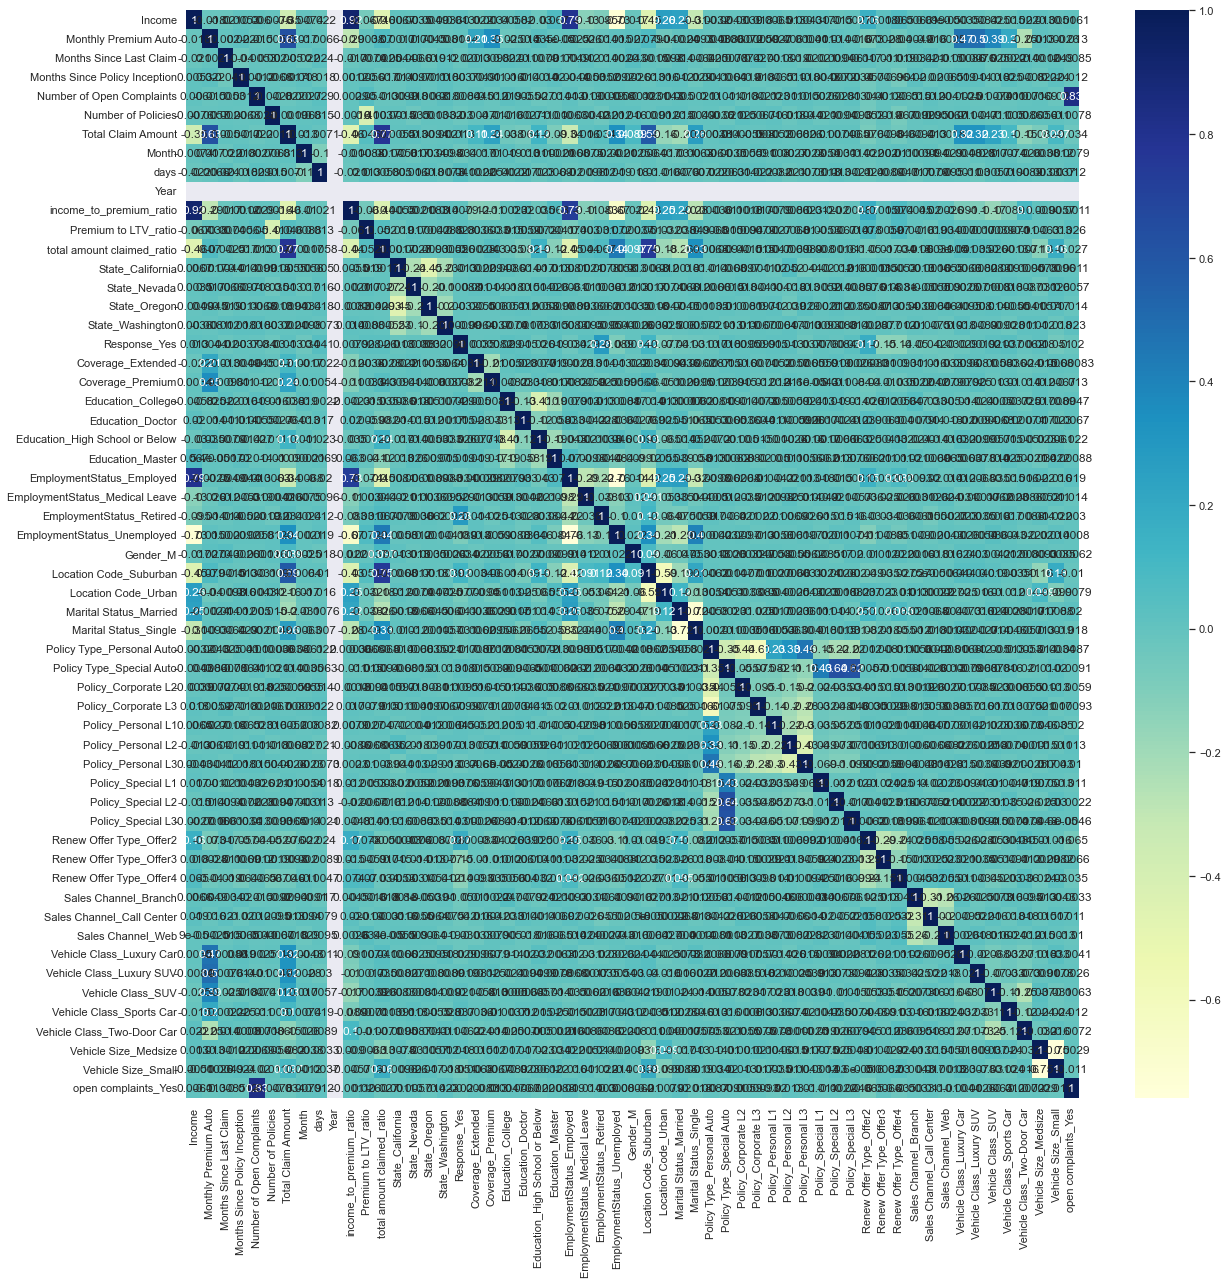

In [197]:
plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

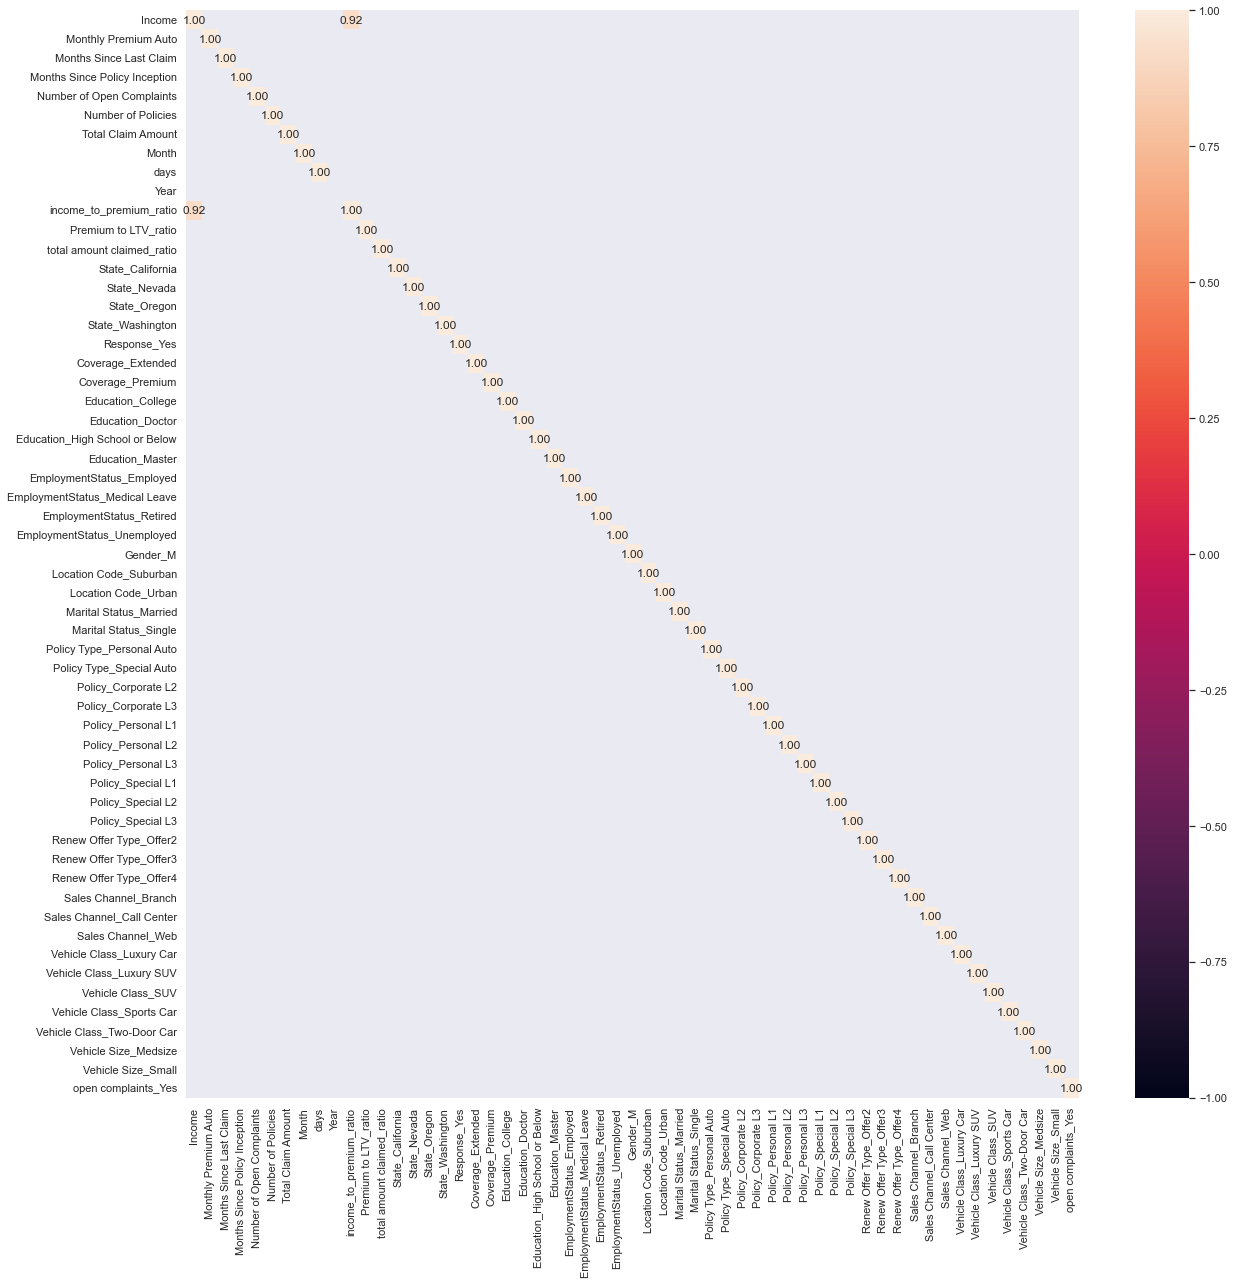

In [198]:
mask = cors[(cors >= 0.85)|(cors <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [199]:
C = train.corr()['Customer Lifetime Value'].sort_values(ascending=False).drop('Customer Lifetime Value')
C 

Monthly Premium Auto             0.408956
Total Claim Amount               0.232402
Number of Policies               0.023987
Income                           0.017391
Months Since Policy Inception    0.016174
Months Since Last Claim          0.007834
total amount claimed_ratio       0.002653
Month                           -0.000156
days                            -0.013643
Number of Open Complaints       -0.039738
income_to_premium_ratio         -0.103666
Premium to LTV_ratio            -0.672409
Year                                  NaN
Name: Customer Lifetime Value, dtype: float64

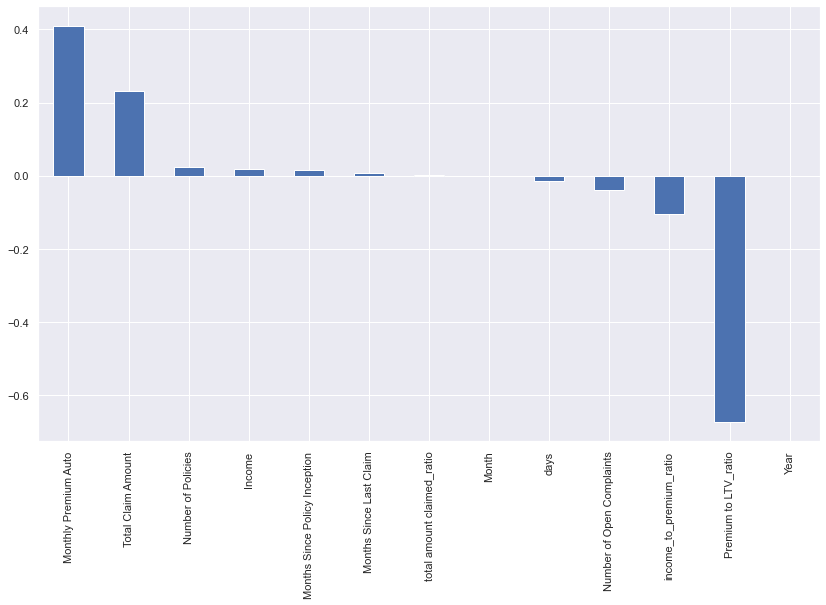

In [200]:
plt.figure(figsize=(14,8))
C.plot.bar()
plt.show()

In [201]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Premium to LTV_ratio,7.516088e-01
Monthly Premium Auto,2.435649e-01
Vehicle Class_Luxury Car,1.456581e-03
Number of Policies,5.715599e-04
Months Since Policy Inception,5.284071e-04
EmploymentStatus_Unemployed,3.900288e-04
Coverage_Extended,2.838849e-04
income_to_premium_ratio,1.959716e-04
Months Since Last Claim,1.867353e-04
Education_High School or Below,1.816073e-04


<Figure size 1800x576 with 0 Axes>

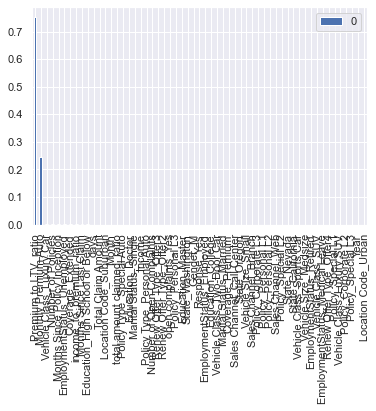

In [202]:
plt.figure(figsize=(25,8))
coef.to_frame().plot.bar(width=0.5)
plt.show()

In [203]:
#9
X_train.drop(['income_to_premium_ratio','Year',"income_to_premium_ratio",'Marital Status_Single','EmploymentStatus_Medical Leave'],axis=1,inplace=True)

In [204]:
X_train.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,days,Premium to LTV_ratio,total amount claimed_ratio,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,open complaints_Yes
0,0.000000,0.143460,0.371429,0.202020,0.0,0.500,0.165102,0.0,0.866667,0.315533,0.396314,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.286920,0.057143,0.727273,0.0,0.000,0.336445,0.0,0.733333,0.739768,0.594595,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.410200,0.172996,0.428571,0.262626,0.6,0.125,0.177278,1.0,0.666667,0.167067,0.396314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.519823,0.270042,0.228571,0.020202,0.8,0.000,0.285494,0.0,0.933333,0.659351,0.520707,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.000000,0.101266,0.114286,0.181818,0.0,0.125,0.317685,0.0,0.200000,0.086180,0.852200,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [205]:
def process(ft):
    ft.reset_index(drop=True, inplace=True)
    ft["Effective To Date"]=pd.to_datetime(ft["Effective To Date"])
    ft["Month"]=ft["Effective To Date"].dt.month
    ft["days"]=ft["Effective To Date"].dt.day
    ft["Year"]=ft["Effective To Date"].dt.year
    ft.drop(['Customer','Effective To Date'],axis=1,inplace=True)
    ft.drop_duplicates(keep='first',inplace=True)
    ft.reset_index(drop=True,inplace=True)
    ft["income_to_premium_ratio"]=ft["Income"]/ft["Monthly Premium Auto"]
    ft["open complaints"]= ft["Number of Open Complaints"].apply (lambda x:"Yes" if x > 0 else "No")
    ft['Premium to LTV_ratio']= ft["Monthly Premium Auto"]/ft['Customer Lifetime Value']
    ft["total amount claimed_ratio"]=ft["Total Claim Amount"]/ft["Monthly Premium Auto"]
    ft=cap_outlier(train,"Income")
    
    cat2=['State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size','open complaints']
    X_test=train.drop(["Customer Lifetime Value"],axis=1)
    y_test=train["Customer Lifetime Value"]
    
    enc_data=pd.DataFrame(encoder.fit_transform(X_test[cat2]).toarray())
    enc_data.columns=encoder.get_feature_names_out()
    X_test=X_test.join(enc_data)
    X_test.drop(cat2,axis=1,inplace=True)
    
    
    X_test = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(X_test, columns=col2)
    X_test.drop(['income_to_premium_ratio','Year',"income_to_premium_ratio",'Marital Status_Single','EmploymentStatus_Medical Leave'],axis=1,inplace=True)
    
    return X_test,y_test
    



    
    


    
    
    

In [206]:
X_test,y_test = process(test)

In [207]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [208]:
model_to_use('RF')

RandomForestRegressor()

In [209]:
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()

Train r2 score:  0.6983125206058154
Test r2 score:  0.6983125206058154
train_mse1:  14495513.078341939
test_mse1:  14495513.078341939


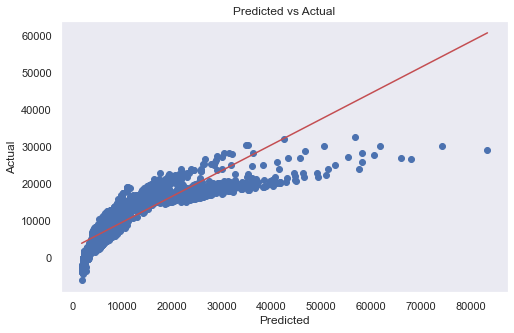

In [210]:
model1 = model_to_use("LR")
model1.fit(X_train, y_train)
evaluate(model1)

Train r2 score:  1.0
Test r2 score:  1.0
train_mse1:  1.5167385418300475e-26
test_mse1:  1.5167385418300475e-26


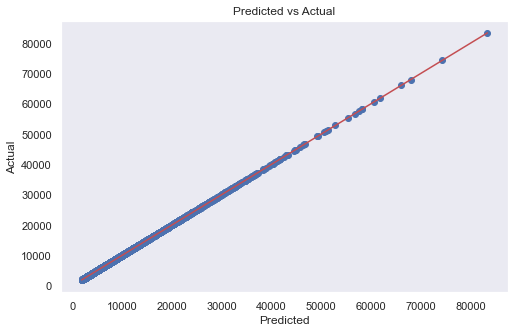

In [211]:
model2 = model_to_use("DT")
model2.fit(X_train, y_train)
evaluate(model2)

Train r2 score:  0.9990778751583024
Test r2 score:  0.9990778751583024
train_mse1:  44306.35546935483
test_mse1:  44306.35546935483


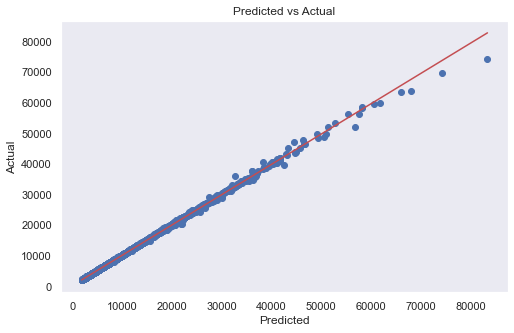

In [212]:
model3 = model_to_use("RF")
model3.fit(X_train, y_train)
evaluate(model3)

Train r2 score:  0.44604225895735417
Test r2 score:  0.44604225895735417
train_mse1:  26616622.26174314
test_mse1:  26616622.26174314


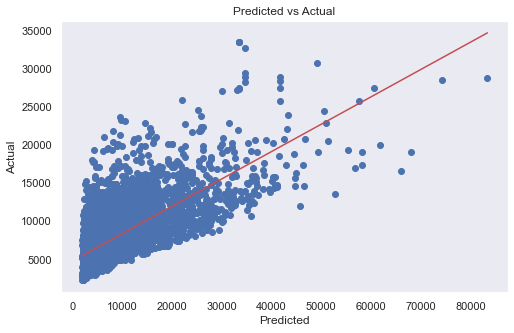

In [213]:
model4 = model_to_use("KNN")
model4.fit(X_train, y_train)
evaluate(model4)

Train r2 score:  0.9999503073981143
Test r2 score:  0.9999503073981143
train_mse1:  2387.6355822854835
test_mse1:  2387.6355822854835


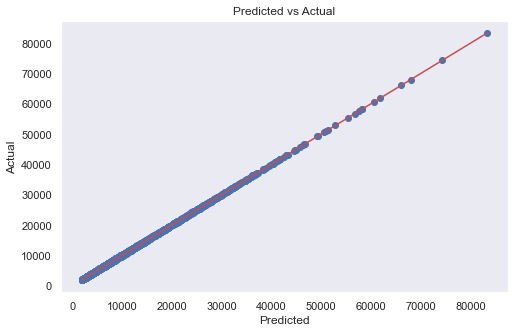

In [214]:
model5 = model_to_use("XGBC")
model5.fit(X_train, y_train)
evaluate(model5)

Train r2 score:  0.9977873657819069
Test r2 score:  0.9977873657819069
train_mse1:  106312.89144104633
test_mse1:  106312.89144104633


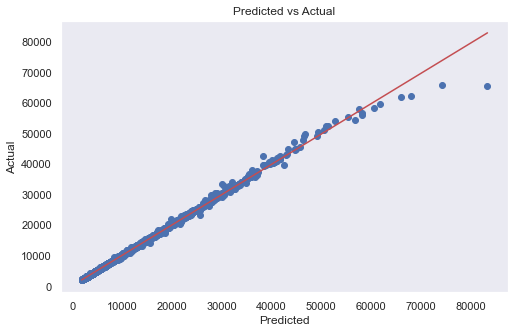

In [216]:
model6 = model_to_use("LGBMC")
model6.fit(X_train, y_train)
evaluate(model5)

Thank you for providing the model performance metrics for each of your models. Based on the information you shared, here's a summary of the evaluation results:

Linear Regression:

Train R2 score: 0.6983125206058154
Test R2 score: 0.6983125206058154
Train MSE: 14495513.078341939
Test MSE: 14495513.078341939
Decision Tree:

Train R2 score: 1.0
Test R2 score: 1.0
Train MSE: 1.5167385418300475e-26
Test MSE: 1.5167385418300475e-26
Random Forest:

Train R2 score: 0.9990778751583024
Test R2 score: 0.9990778751583024
Train MSE: 44306.35546935483
Test MSE: 44306.35546935483
K-Nearest Neighbors (KNN):

Train R2 score: 0.44604225895735417
Test R2 score: 0.44604225895735417
Train MSE: 26616622.26174314
Test MSE: 26616622.26174314
XGBoost Classifier (XGBC):

Train R2 score: 0.9999503073981143
Test R2 score: 0.9999503073981143
Train MSE: 2387.6355822854835
Test MSE: 2387.6355822854835
LightGBM Classifier (LGBMC):

Train R2 score: 0.9977873657819069
Test R2 score: 0.9977873657819069
Train MSE: 106312.89144104633
Test MSE: 106312.89144104633
Now, let's analyze the models. The Decision Tree and Random Forest models both show excellent performance on both the training and test data, with perfect R2 scores and extremely low MSE values. This suggests that these models are capturing the patterns and generalizing well.

The XGBoost Classifier (XGBC) and LightGBM Classifier (LGBMC) also perform very well, with high R2 scores close to 1 and relatively low MSE values.

On the other hand, the Linear Regression model and K-Nearest Neighbors (KNN) model have lower R2 scores and higher MSE values compared to the other models, indicating less accurate predictions.

Based solely on the R2 scores and MSE values, the Decision Tree and Random Forest models appear to perform the best, closely followed by XGBoost Classifier and LightGBM Classifier. However, it's important to consider other factors like computational complexity, interpretability, and specific requirements of your problem domain when selecting the best model.

I recommend further investigating the behavior of these models, examining feature importance, and considering your specific needs before making a final decision.







Linear Regression:

This model has an R2 score of approximately 0.70, which means it can explain about 70% of the variation in your data. Higher R2 scores indicate better performance.
The Mean Squared Error (MSE) for both the training and test data is quite large, indicating that the model's predictions have relatively high errors when compared to the actual values.
Decision Tree:

The Decision Tree model shows perfect performance with an R2 score of 1.0, which means it can perfectly explain the variation in your data.
The MSE for both the training and test data is extremely small, suggesting that the model's predictions are very close to the actual values.
Random Forest:

The Random Forest model also performs excellently with an R2 score of around 0.999, indicating it can explain almost all of the variation in your data.
The MSE for both the training and test data is relatively low, meaning that the model's predictions have small errors compared to the actual values.
K-Nearest Neighbors (KNN):

The KNN model has a lower R2 score of approximately 0.45, which suggests it can only explain about 45% of the variation in your data.
The MSE for both the training and test data is relatively large, indicating that the model's predictions have higher errors compared to the actual values.
XGBoost Classifier (XGBC):

The XGBoost Classifier performs very well with an R2 score close to 1.0, indicating it can explain a large portion of the variation in your data.
The MSE for both the training and test data is relatively low, suggesting that the model's predictions have small errors compared to the actual values.
LightGBM Classifier (LGBMC):

The LightGBM Classifier also shows strong performance with an R2 score close to 1.0, suggesting it can explain a significant amount of the variation in your data.
The MSE for both the training and test data is relatively low, indicating that the model's predictions have small errors compared to the actual values.
In summary, the Decision Tree, Random Forest, XGBoost Classifier, and LightGBM Classifier models demonstrate very good performance. They can effectively capture the patterns in your data and make accurate predictions. The Linear Regression model and K-Nearest Neighbors model, although they can still provide some insights, have relatively lower performance compared to the other models.

Considering these factors, you may want to prioritize the Decision Tree or Random Forest models, as they exhibit perfect performance on the given metrics. However, it's essential to take into account other considerations such as computational requirements and interpretability when selecting the best model for your specific needs.





